In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [8]:
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Rainfall%20Forecast/Rainfall.csv?raw=true'
df = pd.read_csv(url)

In [9]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.drop(['Date', 'Location'], axis=1, inplace=True)

In [13]:
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [15]:
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [16]:
label_encoders = {}
for column in categorical_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [17]:
print(df.isnull().sum())

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64


In [18]:
X = df.drop('RainTomorrow', axis=1)
y_classification = df['RainTomorrow']
y_regression = df['Rainfall']

In [19]:
X_train, X_test, y_train_class, y_test_class = train_test_split(X, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_regression, test_size=0.2, random_state=42)

In [20]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train_class)

RandomForestClassifier(random_state=42)

In [22]:
y_pred_class = clf.predict(X_test)

In [23]:
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class))

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1314
           1       0.88      0.72      0.79       371

    accuracy                           0.92      1685
   macro avg       0.90      0.85      0.87      1685
weighted avg       0.91      0.92      0.91      1685



In [24]:
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [25]:
y_pred_reg = reg.predict(X_test_reg)

In [26]:
print("Mean Squared Error (Rainfall Prediction):")
print(mean_squared_error(y_test_reg, y_pred_reg))

Mean Squared Error (Rainfall Prediction):
1.029569194065278


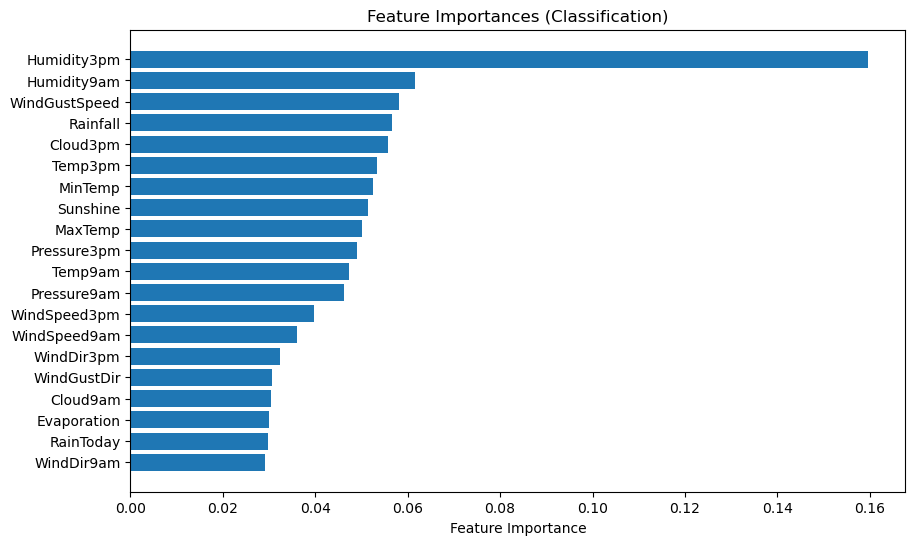

In [27]:
feature_importances_class = clf.feature_importances_
features = X.columns
indices_class = np.argsort(feature_importances_class)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Classification)')
plt.barh(range(len(indices_class)), feature_importances_class[indices_class], align='center')
plt.yticks(range(len(indices_class)), features[indices_class])
plt.xlabel('Feature Importance')
plt.show()

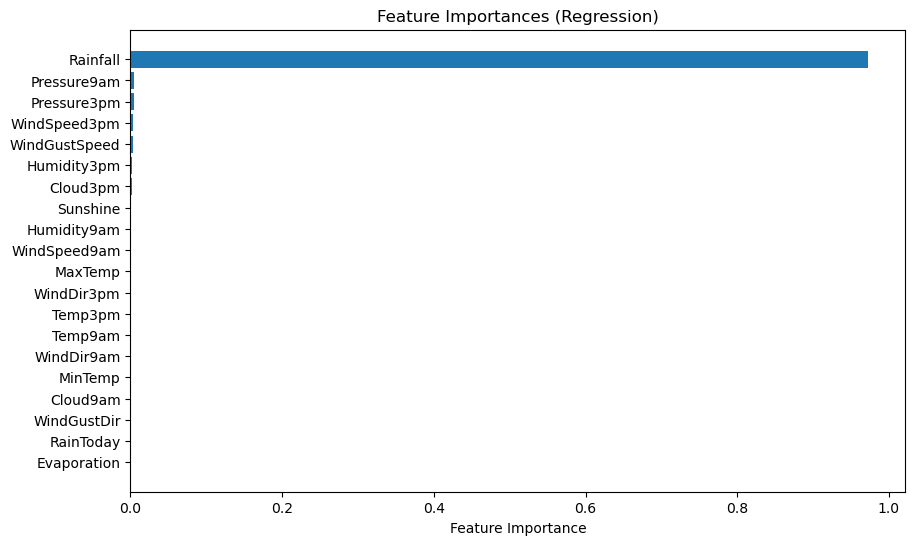

In [28]:
feature_importances_reg = reg.feature_importances_
indices_reg = np.argsort(feature_importances_reg)
plt.figure(figsize=(10, 6))
plt.title('Feature Importances (Regression)')
plt.barh(range(len(indices_reg)), feature_importances_reg[indices_reg], align='center')
plt.yticks(range(len(indices_reg)), features[indices_reg])
plt.xlabel('Feature Importance')
plt.show()